In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from pycaret.classification import *
from pycaret.classification import *
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import function_script
from sklearn.tree import plot_tree
import xgboost 
import catboost
from pycaret.classification import setup, compare_models
import numpy as np
import os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score,recall_score,f1_score

>>First 5 Data Points
  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7   


>>Data Information
            Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min    

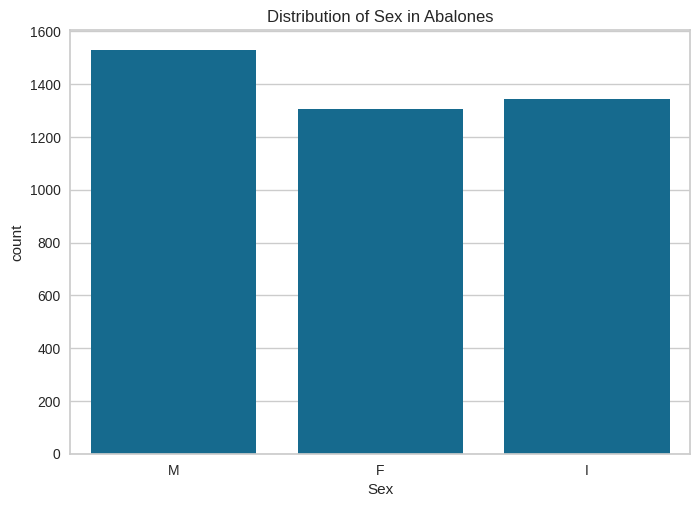

>>Bivariate Analysis: Relationships between features and the Sex


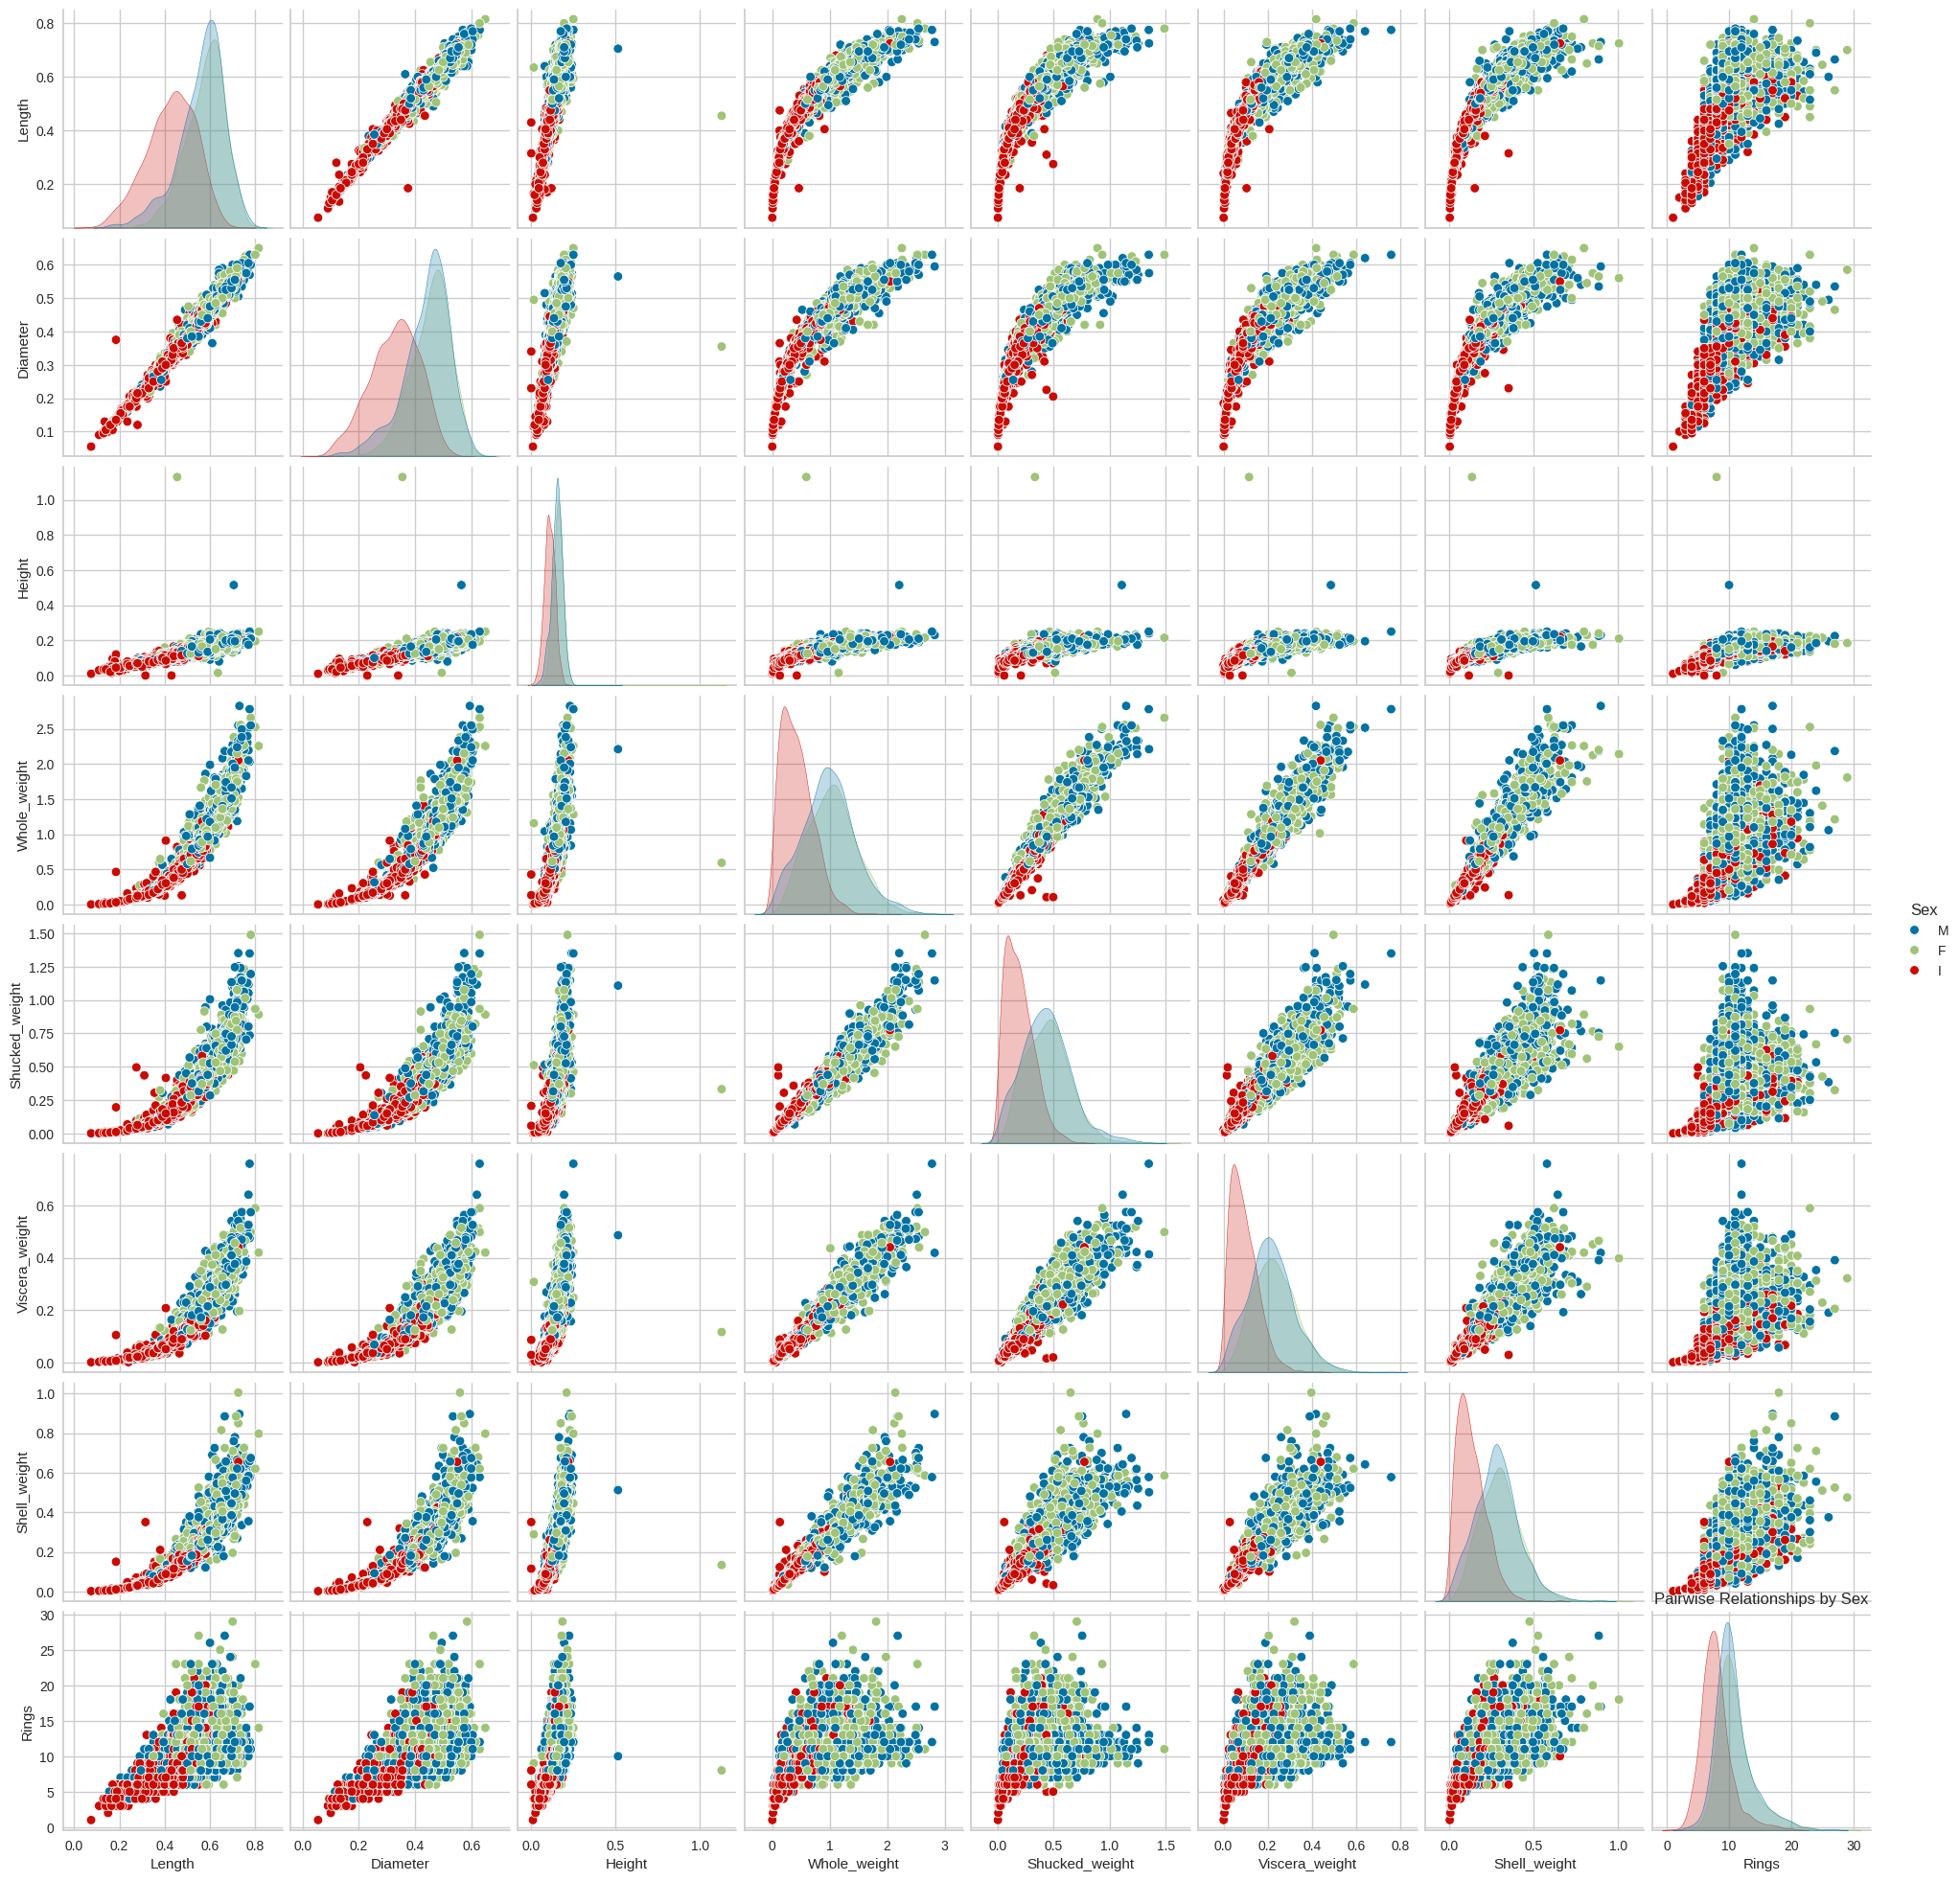

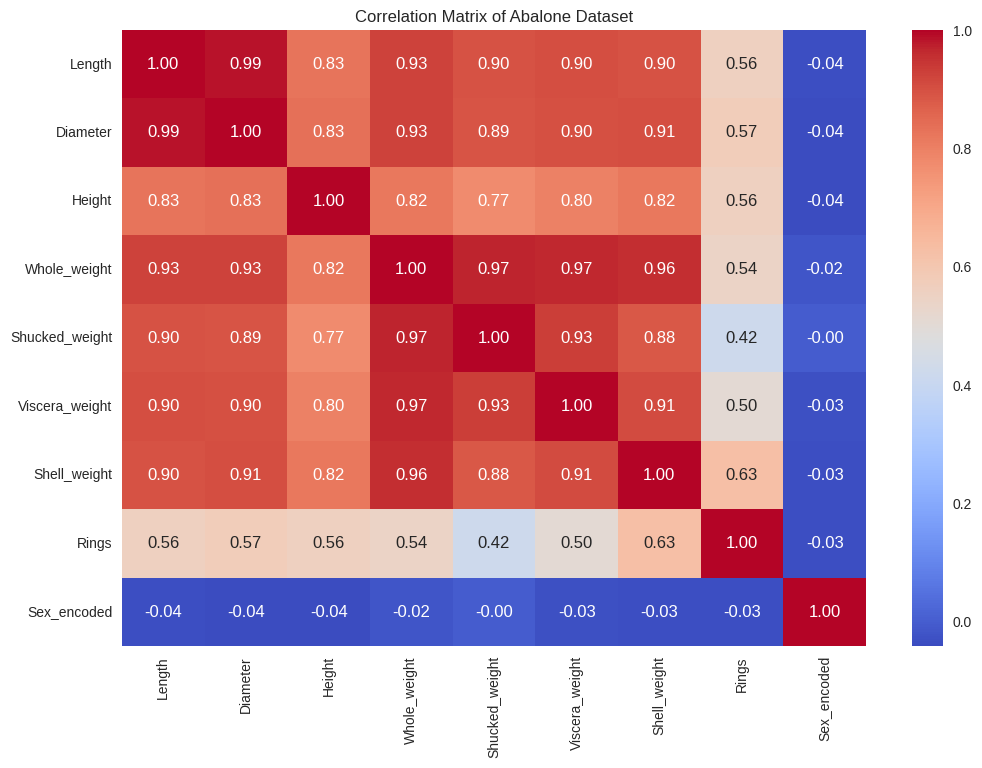

In [2]:

if __name__ == "__main__":
    #Parameter
    target_csv  = 'abalone'#['abalone','50_50', 'fill']
    ground_truth = 'Sex' #['Sex', 'Diabetes_binary']
    Prediction_label = 'All' #['M_F', 'All', 'M', 'F', 'I'] 
    split = '60_20_20' #['60_20_20', '80_10_10'] 
    display_bool = True
    rand_seed = 20
    num_of_models = 3
    save_figure = True
    #1.1 Load ============================================================
    if target_csv == 'fill':
        df = pd.read_csv('../data/diabetes_binary_health_indicators_BRFSS2015.csv')
    if target_csv == '50_50':
        df = pd.read_csv('../data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
    if target_csv == 'abalone':
        df = pd.read_csv('../data/abalone.csv')
    
    
    #2.1 Set Label ============================================================        
    if target_csv == 'abalone' and Prediction_label == 'M_F':  #If classifing Male or Female
        df = df[df['Sex'] != 'I']
    if target_csv == 'abalone' and Prediction_label == 'M': #If classifing Male or not Male
        df['Sex'] = df['Sex'].replace(['F','I'],"N")
    if target_csv == 'abalone' and Prediction_label == 'F': #If classifing Female or not Female
        df['Sex'] = df['Sex'].replace(['M','I'],"N")
    if target_csv == 'abalone' and Prediction_label == 'I': #If classifing Infant or not Infant
        df['Sex'] = df['Sex'].replace(['M','F'],"N")
    
    
    #2.2 Information on data =====================================
    if display_bool == True:
        function_script.info_display(df)


In [3]:
    
    #3.1 Machine learning ============================================================
    #3.2 Splitting 60/20/20
    if split =='60_20_20':
        train_val_data, test_data = train_test_split(df, test_size=0.2, random_state=rand_seed) #split 80/20
        val_split = 0.75 #split 80 to 60/20
    if split =='80_10_10':
        train_val_data, test_data = train_test_split(df, test_size=0.1, random_state=rand_seed) #split 90/10
        val_split = 0.8888 #split 80 to 60/20
    print(train_val_data.shape, test_data.shape)  
    
    #3.3 Setup Models
    #[female :0, Infant:1 Male:2]
    clf1 = setup(data=train_val_data,
                target=ground_truth,
                session_id=rand_seed,
                train_size=val_split,  
                 
                #Preprocessing
                preprocess=True,  
                normalize=True, 
                normalize_method='zscore', # ['zscore','minmax','maxabs', 'robust']
                fix_imbalance= True,
                fix_imbalance_method= 'smote',
                 
                #Feature Engineering
                polynomial_features= True,
                polynomial_degree =2,

                #feature_selection=True,
                #bin_numeric_features=['Rings'],
                #remove_outliers =True,
                #group_features = {'weights_group': ['Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']},
                 
                #Others 
                fold = 10,
                use_gpu =False,
                )
    print(clf1)
    transformed_dataset = get_config('X_train_transformed')
    feature_names = transformed_dataset.columns
    print(feature_names)

    all_models = models()
    print(all_models)

(3341, 9) (836, 9)


,Description,Value
0,Session id,20
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(3341, 9)"
5,Transformed data shape,"(3632, 45)"
6,Transformed train set shape,"(2796, 45)"
7,Transformed test set shape,"(836, 45)"
8,Numeric features,8
9,Preprocess,True


Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings', 'Length^2',
       'Length Diameter', 'Length Height', 'Length Whole_weight',
       'Length Shucked_weight', 'Length Viscera_weight', 'Length Shell_weight',
       'Length Rings', 'Diameter^2', 'Diameter Height',
       'Diameter Whole_weight', 'Diameter Shucked_weight',
       'Diameter Viscera_weight', 'Diameter Shell_weight', 'Diameter Rings',
       'Height^2', 'Height Whole_weight', 'Height Shucked_weight',
       'Height Viscera_weight', 'Height Shell_weight', 'Height Rings',
       'Whole_weight^2', 'Whole_weight Shucked_weight',
       'Whole_weight Viscera_weight', 'Whole_weight Shell_weight',
       'Whole_weight Rings', 'Shucked_weight^2',
       'Shucked_weight Viscera_weight', 'Shucked_weight Shell_weight',
       'Shucked_weight Rings', 'Viscera_weight^2',
       'Viscera_weight Shell_weight', 'Viscera_weight Rings', 'Shell_weight^2',
       'Shell_w

In [4]:
    #3.4 Compare model
    best_models = compare_models(sort = 'AUC', n_select = num_of_models)
    print(best_models)

    #3.5 Ensemble / Blend Model
    if num_of_models != 1:
        best_model_blend = blend_models(estimator_list=best_models, optimize='AUC')
    if num_of_models == 1: 
        best_model = ensemble_model(
            estimator=best_model, 
        )



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5553,0.7606,0.5553,0.5474,0.5378,0.3386,0.3470,0.1960
lda,Linear Discriminant Analysis,0.5457,0.7511,0.5457,0.5372,0.5381,0.3196,0.3216,0.0110
rf,Random Forest Classifier,0.5641,0.7496,0.5641,0.5598,0.5599,0.3453,0.3466,0.1030
catboost,CatBoost Classifier,0.5577,0.7486,0.5577,0.5512,0.5515,0.3363,0.3381,10.2680
gbc,Gradient Boosting Classifier,0.5617,0.7485,0.5617,0.5556,0.5543,0.3440,0.3468,0.7200
et,Extra Trees Classifier,0.5557,0.7436,0.5557,0.5505,0.5509,0.3328,0.3341,0.0530
xgboost,Extreme Gradient Boosting,0.5405,0.7377,0.5405,0.5389,0.5383,0.3095,0.3104,0.2080
lightgbm,Light Gradient Boosting Machine,0.5433,0.7360,0.5433,0.5391,0.5394,0.3139,0.3149,1.4430
nb,Naive Bayes,0.5226,0.7305,0.5226,0.5183,0.4693,0.2965,0.3224,0.0090
qda,Quadratic Discriminant Analysis,0.4978,0.7231,0.4978,0.4831,0.4568,0.2545,0.2736,0.0100


[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=20, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=20, 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5618,0.7730,0.5618,0.5503,0.5519,0.3450,0.3477
1,0.6016,0.7750,0.6016,0.5957,0.5945,0.4037,0.4065
2,0.5657,0.7552,0.5657,0.5633,0.5627,0.3495,0.3508
3,0.5538,0.7656,0.5538,0.5552,0.5506,0.3331,0.3358
4,0.5857,0.7672,0.5857,0.5747,0.5729,0.3805,0.3852
5,0.5360,0.7513,0.5360,0.5282,0.5285,0.3064,0.3086
6,0.5600,0.7880,0.5600,0.5493,0.5501,0.3427,0.3457
7,0.5560,0.7578,0.5560,0.5459,0.5427,0.3360,0.3411
8,0.5280,0.7318,0.5280,0.5109,0.5126,0.2940,0.2978


In [5]:
    #3.6 Tune Model
    best_model_tune = tune_model (best_model_blend, optimize ='AUC') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5657,0.7751,0.5657,0.5554,0.5556,0.3514,0.3547
1,0.6016,0.7749,0.6016,0.5958,0.5938,0.4042,0.4074
2,0.5618,0.7547,0.5618,0.5591,0.5595,0.3425,0.3431
3,0.5538,0.7693,0.5538,0.5563,0.5507,0.3333,0.3363
4,0.5857,0.7684,0.5857,0.5755,0.5721,0.3808,0.3864
5,0.5400,0.7537,0.5400,0.5319,0.5308,0.3134,0.3167
6,0.5600,0.7887,0.5600,0.5521,0.5509,0.3430,0.3462
7,0.5560,0.7579,0.5560,0.5450,0.5427,0.3355,0.3403
8,0.5280,0.7301,0.5280,0.5114,0.5127,0.2942,0.2982


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [6]:
    #3.7 Evaluate Model   
    evaluate_model(best_models[0])
    evaluate_model(best_models[1])
    evaluate_model(best_models[2])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [7]:

    # Function to save plots
    def save_model_plots(model, plot_types, model_name):
        # Create a directory for the model's plots
        os.makedirs(f"{model_name}_figures", exist_ok=True)
    
        for plot_type in plot_types:
            try:
                save_path = f"{model_name}_figures/"
                plot_model(model, plot=plot_type, save=save_path)
                print(f"Plot '{plot_type}' saved successfully in {save_path}.")
            except Exception as e:
                print(f"Failed to save plot '{plot_type}'. Error: {e}")


    plot_types = ['auc', 'confusion_matrix', 'threshold', 'pr', 'error', 'class_report', 
                  'boundary', 'learning', 'manifold', 'calibration', 'vc', 'dimension', 
                  'feature', 'parameter', 'lift', 'gain', 'tree', 'ks']
    model_names = [model.__class__.__name__ for model in best_models]
    print(model_names)
    if save_figure == True:
        count = 0
        for model_name in model_names:
            save_model_plots(best_models[count], plot_types,model_name)
            count +=1


['LogisticRegression', 'LinearDiscriminantAnalysis', 'RandomForestClassifier']


Plot 'auc' saved successfully in LogisticRegression_figures/.


Plot 'confusion_matrix' saved successfully in LogisticRegression_figures/.
Failed to save plot 'threshold'. Error: Plot Not Available for multiclass problems. Please see docstring for list of available Plots.


Plot 'pr' saved successfully in LogisticRegression_figures/.


Plot 'error' saved successfully in LogisticRegression_figures/.


Plot 'class_report' saved successfully in LogisticRegression_figures/.


Plot 'boundary' saved successfully in LogisticRegression_figures/.


Plot 'learning' saved successfully in LogisticRegression_figures/.
Failed to save plot 'manifold'. Error: Plot Not Available for multiclass problems. Please see docstring for list of available Plots.
Failed to save plot 'calibration'. Error: Plot Not Available for multiclass problems. Please see docstring for list of available Plots.


Plot 'vc' saved successfully in LogisticRegression_figures/.


Plot 'dimension' saved successfully in LogisticRegression_figures/.


Plot 'feature' saved successfully in LogisticRegression_figures/.


,Parameters
C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


Plot 'parameter' saved successfully in LogisticRegression_figures/.


Failed to save plot 'lift'. Error: Cannot calculate Lift Curve for data with 3 category/ies


Failed to save plot 'gain'. Error: Cannot calculate Cumulative Gains for data with 3 category/ies
Failed to save plot 'tree'. Error: Decision Tree plot is only available for scikit-learn Decision Trees and Forests, Ensemble models using those or Stacked models using those as meta (final) estimators.


Failed to save plot 'ks'. Error: Cannot calculate KS statistic for data with 3 category/ies


Plot 'auc' saved successfully in LinearDiscriminantAnalysis_figures/.


Plot 'confusion_matrix' saved successfully in LinearDiscriminantAnalysis_figures/.
Failed to save plot 'threshold'. Error: Plot Not Available for multiclass problems. Please see docstring for list of available Plots.


Plot 'pr' saved successfully in LinearDiscriminantAnalysis_figures/.


Plot 'error' saved successfully in LinearDiscriminantAnalysis_figures/.


Plot 'class_report' saved successfully in LinearDiscriminantAnalysis_figures/.


Plot 'boundary' saved successfully in LinearDiscriminantAnalysis_figures/.


Plot 'learning' saved successfully in LinearDiscriminantAnalysis_figures/.
Failed to save plot 'manifold'. Error: Plot Not Available for multiclass problems. Please see docstring for list of available Plots.
Failed to save plot 'calibration'. Error: Plot Not Available for multiclass problems. Please see docstring for list of available Plots.


Failed to save plot 'vc'. Error: Plot not supported for this estimator. Try different estimator.


Plot 'dimension' saved successfully in LinearDiscriminantAnalysis_figures/.


Plot 'feature' saved successfully in LinearDiscriminantAnalysis_figures/.


,Parameters
covariance_estimator,None
n_components,None
priors,None
shrinkage,None
solver,svd
store_covariance,False
tol,0.0001


Plot 'parameter' saved successfully in LinearDiscriminantAnalysis_figures/.


Failed to save plot 'lift'. Error: Cannot calculate Lift Curve for data with 3 category/ies


Failed to save plot 'gain'. Error: Cannot calculate Cumulative Gains for data with 3 category/ies
Failed to save plot 'tree'. Error: Decision Tree plot is only available for scikit-learn Decision Trees and Forests, Ensemble models using those or Stacked models using those as meta (final) estimators.


Failed to save plot 'ks'. Error: Cannot calculate KS statistic for data with 3 category/ies


Plot 'auc' saved successfully in RandomForestClassifier_figures/.


Plot 'confusion_matrix' saved successfully in RandomForestClassifier_figures/.
Failed to save plot 'threshold'. Error: Plot Not Available for multiclass problems. Please see docstring for list of available Plots.


Plot 'pr' saved successfully in RandomForestClassifier_figures/.


Plot 'error' saved successfully in RandomForestClassifier_figures/.


Plot 'class_report' saved successfully in RandomForestClassifier_figures/.


Plot 'boundary' saved successfully in RandomForestClassifier_figures/.


Plot 'learning' saved successfully in RandomForestClassifier_figures/.
Failed to save plot 'manifold'. Error: Plot Not Available for multiclass problems. Please see docstring for list of available Plots.
Failed to save plot 'calibration'. Error: Plot Not Available for multiclass problems. Please see docstring for list of available Plots.


Plot 'vc' saved successfully in RandomForestClassifier_figures/.


Plot 'dimension' saved successfully in RandomForestClassifier_figures/.


Plot 'feature' saved successfully in RandomForestClassifier_figures/.


,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


Plot 'parameter' saved successfully in RandomForestClassifier_figures/.


Failed to save plot 'lift'. Error: Cannot calculate Lift Curve for data with 3 category/ies


Failed to save plot 'gain'. Error: Cannot calculate Cumulative Gains for data with 3 category/ies


Plot 'tree' saved successfully in RandomForestClassifier_figures/.


Failed to save plot 'ks'. Error: Cannot calculate KS statistic for data with 3 category/ies


In [9]:
    evaluate_model(best_model_tune)
    if save_figure == True:
        save_model_plots(best_model_tune, plot_types,'Best_model_val')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Plot 'auc' saved successfully in Best_model_val_figures/.


Plot 'confusion_matrix' saved successfully in Best_model_val_figures/.
Failed to save plot 'threshold'. Error: Plot Not Available for multiclass problems. Please see docstring for list of available Plots.


Plot 'pr' saved successfully in Best_model_val_figures/.


Plot 'error' saved successfully in Best_model_val_figures/.


Plot 'class_report' saved successfully in Best_model_val_figures/.


Plot 'boundary' saved successfully in Best_model_val_figures/.


Plot 'learning' saved successfully in Best_model_val_figures/.
Failed to save plot 'manifold'. Error: Plot Not Available for multiclass problems. Please see docstring for list of available Plots.
Failed to save plot 'calibration'. Error: Plot Not Available for multiclass problems. Please see docstring for list of available Plots.


Failed to save plot 'vc'. Error: Plot not supported for this estimator. Try different estimator.


Plot 'dimension' saved successfully in Best_model_val_figures/.
Failed to save plot 'feature'. Error: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.


,Parameters
estimators,"[('Logistic Regression', LogisticRegression(C=..."
flatten_transform,True
n_jobs,-1
verbose,False
voting,soft
weights,"[0.67, 0.18000000000000002, 0.48000000000000004]"


Plot 'parameter' saved successfully in Best_model_val_figures/.


Failed to save plot 'lift'. Error: Cannot calculate Lift Curve for data with 3 category/ies


Failed to save plot 'gain'. Error: Cannot calculate Cumulative Gains for data with 3 category/ies
Failed to save plot 'tree'. Error: Decision Tree plot is only available for scikit-learn Decision Trees and Forests, Ensemble models using those or Stacked models using those as meta (final) estimators.


Failed to save plot 'ks'. Error: Cannot calculate KS statistic for data with 3 category/ies


In [10]:
    #3.8 Finalize Model      
    final_model = finalize_model(best_model_tune)

In [11]:
    #4.1 Testing data ================================================================
    predictions = predict_model(final_model, data=test_data)
    print(predictions)

    # Get the actual labels
    actual_labels = test_data[ground_truth]  
    
    # Get the predicted labels from the predictions DataFrame
    predicted_labels = predictions['prediction_label']

  
    # Calculate various performance metrics
    accuracy = accuracy_score(actual_labels, predicted_labels)
    precision = precision_score(actual_labels, predicted_labels, average='weighted')  
    recall = recall_score(actual_labels, predicted_labels, average='weighted')       
    f1 = f1_score(actual_labels, predicted_labels, average='weighted')               
    
    # Print the performance metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
    
    cm = confusion_matrix(actual_labels, predicted_labels)
    cr = classification_report(actual_labels, predicted_labels)
    
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)


   


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.5610,0.7691,0.5610,0.5498,0.5536,0.3420,0.3430


      Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
2450   0.420     0.330   0.125        0.4630          0.1860          0.1100   
3192   0.525     0.405   0.115        0.7200          0.3105          0.1915   
596    0.550     0.430   0.140        0.7135          0.2565          0.1860   
3585   0.625     0.485   0.160        1.2135          0.6310          0.2235   
544    0.380     0.290   0.105        0.2570          0.0990          0.0510   
...      ...       ...     ...           ...             ...             ...   
2064   0.535     0.420   0.125        0.7380          0.3550          0.1895   
3176   0.490     0.380   0.130        0.5390          0.2290          0.1355   
32     0.665     0.525   0.165        1.3380          0.5515          0.3575   
2623   0.705     0.560   0.205        2.3810          0.9915          0.5005   
1995   0.320     0.240   0.070        0.1330          0.0585          0.0255   

      Shell_weight  Rings  Sex predicti

In [12]:
    save_model(final_model, 'abolone_model_'+str(Prediction_label))

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Length', 'Diameter', 'Height',
                                              'Whole_weight', 'Shucked_weight',
                                              'Viscera_weight', 'Shell_weight',
                                              'Rings'],
                                     transformer=SimpleImputer(add_indicato...
                                                                       max_leaf_nodes=None,
                                                                       max_samples=None,
                                                                       min_impurity_decrease=0.0,
                            